In [ ]:
import pandas as pd
train_df = pd.read_csv("train.csv",encoding="utf-8")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
import pandas as pd
test_df = pd.read_csv("test.csv",encoding="utf-8")
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#1.填缺失值:有大小關係的填中位數
med = train_df.median()
train_df = train_df.fillna(med)
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#(測試資料填補)千萬不要重新算，用訓練算出的值來補
test_df = test_df.fillna(med)
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [6]:
#填缺失值:類別 → 捕最常出現的字
most = train_df["Embarked"].value_counts().idxmax()
train_df["Embarked"] = train_df["Embarked"].fillna(most)
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [7]:
test_df["Embarked"] = test_df["Embarked"].fillna(most)
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [8]:
#2.對類別(?種)的特徵 → one hot encoding (因為不能承認他們有大小關係)
#轉0,1,2 → 承認有大小關係
dummy = pd.get_dummies(train_df["Embarked"])
#axis=0 → 直的接 ； axis=1 → 橫的接
train_df = pd.concat([train_df,dummy],axis=1)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,0


In [9]:
dummy = pd.get_dummies(test_df["Embarked"])
#axis=0 → 直的接 ； axis=1 → 橫的接
test_df = pd.concat([test_df,dummy],axis=1)
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,1
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S,0,0,1


In [10]:
#Sex:雖然可以不用做，但是我通常偷懶，所以順勢做一下
dummy = pd.get_dummies(train_df["Sex"])
#axis=0 → 直的接 ； axis=1 → 橫的接
train_df = pd.concat([train_df,dummy],axis=1)

dummy = pd.get_dummies(test_df["Sex"])
#axis=0 → 直的接 ； axis=1 → 橫的接
test_df = pd.concat([test_df,dummy],axis=1)

In [11]:
#3.處理比較困難的特徵
mid = "Braund, Mr. Owen Harris".split(",")[-1].split(".")[0]
mid = mid.replace(" ","")
mid

'Mr'

In [12]:
#pandas apply (流程名字)
#如果遇到種類是很多很多的時候，看一下每種有幾個
def name_flow(S):
    mid = S.split(",")[-1].split(".")[0]
    mid = mid.replace(" ","")
    return mid

name = train_df["Name"].apply(name_flow)
pd.crosstab(name,train_df["Survived"]).T


Name,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,theCountess
Survived,,,,,,,,,,,,,,,,,
0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [13]:
def name_flow(S):
    mid = S.split(",")[-1].split(".")[0]
    mid = mid.replace(" ","")
    if mid == "Miss":
        return "Miss"
    elif mid == "Mr":
        return "Mr"
    elif mid == "Mrs":
        return "Mrs"
    else:
        return "Throw"
name = train_df["Name"].apply(name_flow)
dummy = pd.get_dummies(name)
#axis=0 → 直的接 ； axis=1 → 橫的接
train_df = pd.concat([train_df,dummy],axis=1)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,C,Q,S,female,male,Miss,Mr,Mrs,Throw
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,0,0,1,0,1,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,1,0,0,1,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,0,1,1,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,0,0,1,1,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,S,0,0,1,0,1,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,S,0,0,1,1,0,1,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,...,S,0,0,1,1,0,1,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,C,1,0,0,0,1,0,1,0,0


In [14]:
name = test_df["Name"].apply(name_flow)
dummy = pd.get_dummies(name)
#axis=0 → 直的接 ； axis=1 → 橫的接
test_df = pd.concat([test_df,dummy],axis=1)
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,female,male,Miss,Mr,Mrs,Throw
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S,0,0,1,0,1,0,1,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0,0,1,0,0,0,0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,1,0,1,0,1,0,0
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S,0,0,1,0,1,0,1,0,0


In [15]:
#要丟掉東西，印一下看一下欄位是那些
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'C', 'Q', 'S', 'female',
       'male', 'Miss', 'Mr', 'Mrs', 'Throw'],
      dtype='object')

In [16]:
#train_df先把PassengerId Drop，test_df先留著
train_df = train_df.drop(['PassengerId',  'Name', 'Sex',  'Ticket',  'Cabin', 'Embarked', 'Throw'],axis=1)
test_df = test_df.drop(['Name', 'Sex',  'Ticket',  'Cabin', 'Embarked', 'Throw'],axis=1)
train_df

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Miss,Mr,Mrs
0,0,3,22.0,1,0,7.2500,0,0,1,0,1,0,1,0
1,1,1,38.0,1,0,71.2833,1,0,0,1,0,0,0,1
2,1,3,26.0,0,0,7.9250,0,0,1,1,0,1,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,0,1,0,1,0,0,0
887,1,1,19.0,0,0,30.0000,0,0,1,1,0,1,0,0
888,0,3,28.0,1,2,23.4500,0,0,1,1,0,1,0,0
889,1,1,26.0,0,0,30.0000,1,0,0,0,1,0,1,0


In [17]:
test_df

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Miss,Mr,Mrs
0,892,3,34.5,0,0,7.8292,0,1,0,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,0,1,0,1,0,1,0
4,896,3,22.0,1,1,12.2875,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,28.0,0,0,8.0500,0,0,1,0,1,0,1,0
414,1306,1,39.0,0,0,108.9000,1,0,0,1,0,0,0,0
415,1307,3,38.5,0,0,7.2500,0,0,1,0,1,0,1,0
416,1308,3,28.0,0,0,8.0500,0,0,1,0,1,0,1,0


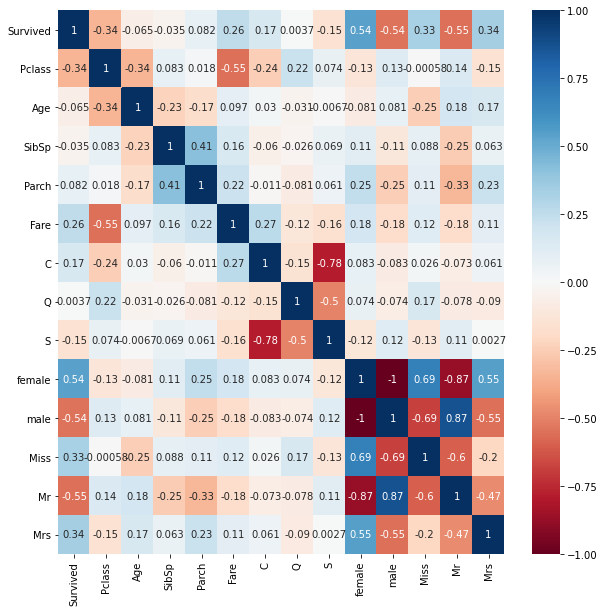

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
#自動幫你每一格做.show()
%matplotlib inline
plt.figure(figsize=(10,10))
sns.heatmap(train_df.corr(),annot=True,cmap="RdBu")


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#numpy → 處理大量數字
import numpy as np
train_x = train_df.drop(["Survived"],axis=1)
train_y = train_df["Survived"]
# n_estimators → 你要有幾棵樹
clf = RandomForestClassifier(max_depth=7,n_estimators=27)
np.average(cross_val_score(clf,train_x,train_y,cv=10))

0.8384394506866416

In [20]:
from sklearn.model_selection import GridSearchCV
#max_depth:[5,6,7,8,9,10]
p = {"max_depth":range(5,11),
    "n_estimators":range(20,31)}
clf = RandomForestClassifier()
s = GridSearchCV(clf,p,cv=10)
s.fit(train_x,train_y)
print(s.best_params_)
print(s.best_score_)

{'max_depth': 9, 'n_estimators': 28}
0.8373283395755307


In [24]:
test_x = test_df.drop(["PassengerId"],axis=1)
test_id = test_df["PassengerId"]
clf = RandomForestClassifier(max_depth=8, n_estimators=25)
clf.fit(train_x,train_y)
pre = clf.predict(test_x)
result = pd.DataFrame()
result["PassengerId"] = test_id
result["Survived"] = pre
#index=False → 不要儲存列編號(0,1,2,...)
result.to_csv("result.csv",encoding="utf-8",index=False)
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [22]:
clf.feature_importances_

array([0.10568337, 0.13362298, 0.04937741, 0.03429673, 0.17370505,
       0.01667406, 0.00929797, 0.01611884, 0.15092604, 0.09744429,
       0.03274354, 0.13830385, 0.04180587])

In [23]:
train_x.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S', 'female',
       'male', 'Miss', 'Mr', 'Mrs'],
      dtype='object')